In [1]:
from shapely.geometry import Polygon
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

def list_to_coord(x):
    x0 = x[0]
    x1 = x[1]
    x2 = x[2]
    x3 = x[3]
    
    x = [[x0, x2], [x1, x2], [x1, x3], [x0, x3]]
    return x

def calculate_iou(box_1, box_2):
    box_1 = list_to_coord(box_1)
    box_2 = list_to_coord(box_2)
    
    poly_1 = Polygon(box_1)
    poly_2 = Polygon(box_2)
    iou = poly_1.intersection(poly_2).area / poly_1.union(poly_2).area
    return iou

def convert(x, label=True):
    x_min = int((float(x[1])-(float(x[3])/2))*640)
    x_max = int((float(x[1])+(float(x[3])/2))*640)

    y_min = int((float(x[2])-(float(x[4])/2))*640)
    y_max = int((float(x[2])+(float(x[4])/2))*640)
    
    if not label:
        return x_min, x_max, y_min, y_max
    else:
        return x_min, x_max, y_min, y_max, int(x[0])
    
def calculate_area(prediction):
    return (prediction[1] - prediction[0] + 1) * (prediction[3] - prediction[2] + 1)

In [2]:
def test_iou(save_area=False):
    collect_true = []
    collect_predicted = []

    best_iou = []

    for txt in sorted(os.listdir('runs/detect/exp10/labels/')):
        with open('test_noise/train/labels/' + txt) as f:
            true_labels = list(map(lambda x: x[:-2].split(), f.readlines()))
        with open('runs/detect/exp10/labels/' + txt) as t:
            predicted_labels = list(map(lambda x: x[:-2].split(), t.readlines()))

        correct_ious = []

        for true in true_labels:
            for predict in predicted_labels:
                    correct_ious.append([calculate_iou(convert(true), convert(predict)), 
                                         true[0], 
                                         predict[-1],
                                         txt
                                         ] + list(convert(true, label=False)) + list(convert(predict, label=False)))
        
        best_iou.append(correct_ious[np.argmax(np.array(np.array(correct_ious)[:, 0], dtype=float))])
        
    return best_iou

In [3]:
ious = pd.DataFrame(test_iou(), columns=['iou', 'label', 'confidence', 'image', 
                                         'xmin_true', 'xmax_true','ymin_true', 'ymax_true',
                                        'xmin_pred', 'xmax_pred','ymin_pred', 'ymax_pred',])   
ious['confidence'] = ious['confidence'].astype(float)

ious.head()

iou label  confidence                                              image  \
0  0.0   697     0.58243  charlotte_1122851793886401988_20151121_jpg.rf....   
1  0.0   755     0.37900  charlotte_1123562859839451256_20151122_jpg.rf....   
2  0.0   492     0.31036  charlotte_1194770380790211088_20160228_jpg.rf....   
3  0.0   470     0.32764  charlotte_1221761855423481093_20160405_jpg.rf....   
4  0.0   567     0.39640  charlotte_1240888932309606289_20160501_jpg.rf....   

   xmin_true  xmax_true  ymin_true  ymax_true  xmin_pred  xmax_pred  \
0        270        357        193        237        608        640   
1         45        165         74        177        431        468   
2        535        600        137        181        109        162   
3        358        551        237        278        110        142   
4          3         77        379        500        262        282   

   ymin_pred  ymax_pred  
0         58         89  
1        525        551  
2        248        272  
3          0         39  
4        231        251

In [4]:
len(set(ious['label']))

297

In [5]:
ious.describe()

iou  confidence   xmin_true   xmax_true   ymin_true   ymax_true  \
count  429.000000  429.000000  429.000000  429.000000  429.000000  429.000000   
mean     0.210588    0.523132  278.002331  381.317016  296.144522  368.552448   
std      0.370442    0.206499  171.650829  169.532279  181.566927  181.271651   
min      0.000000    0.251390    0.000000   38.000000    0.000000   33.000000   
25%      0.000000    0.339900  135.000000  242.000000  154.000000  228.000000   
50%      0.000000    0.477300  275.000000  386.000000  299.000000  359.000000   
75%      0.161161    0.708990  420.000000  518.000000  455.000000  531.000000   
max      0.985714    0.933700  601.000000  639.000000  615.000000  639.000000   

        xmin_pred   xmax_pred   ymin_pred   ymax_pred  
count  429.000000  429.000000  429.000000  429.000000  
mean   279.564103  350.629371  311.494172  362.006993  
std    169.909593  171.220755  173.282475  172.665246  
min      0.000000   15.000000    0.000000   12.000000  
25%    144.000000  225.000000  179.000000  226.000000  
50%    280.000000  342.000000  317.000000  362.000000  
75%    410.000000  485.000000  438.000000  499.000000  
max    632.000000  640.000000  627.000000  640.000000

In [6]:
ious['confidence_quantiles'] = pd.qcut(ious['confidence'], 4, labels=['low', 'medium-low', 'medium-high', 'high'])
ious.head()

iou label  confidence                                              image  \
0  0.0   697     0.58243  charlotte_1122851793886401988_20151121_jpg.rf....   
1  0.0   755     0.37900  charlotte_1123562859839451256_20151122_jpg.rf....   
2  0.0   492     0.31036  charlotte_1194770380790211088_20160228_jpg.rf....   
3  0.0   470     0.32764  charlotte_1221761855423481093_20160405_jpg.rf....   
4  0.0   567     0.39640  charlotte_1240888932309606289_20160501_jpg.rf....   

   xmin_true  xmax_true  ymin_true  ymax_true  xmin_pred  xmax_pred  \
0        270        357        193        237        608        640   
1         45        165         74        177        431        468   
2        535        600        137        181        109        162   
3        358        551        237        278        110        142   
4          3         77        379        500        262        282   

   ymin_pred  ymax_pred confidence_quantiles  
0         58         89          medium-high  
1        525        551           medium-low  
2        248        272                  low  
3          0         39                  low  
4        231        251           medium-low

In [7]:
ious[ious['iou'] != 0].groupby('confidence_quantiles')['iou'].mean()

confidence_quantiles
low            0.715149
medium-low     0.667952
medium-high    0.746474
high           0.761980
Name: iou, dtype: float64

In [8]:
ious[ious['iou'] == 0].groupby('confidence_quantiles')['iou'].size() / ious.groupby('confidence_quantiles')['iou'].size()

confidence_quantiles
low            0.814815
medium-low     0.738318
medium-high    0.654206
high           0.635514
Name: iou, dtype: float64

<AxesSubplot:title={'center':'IoU by Confidence'}, xlabel='Confidence', ylabel='IoU'>

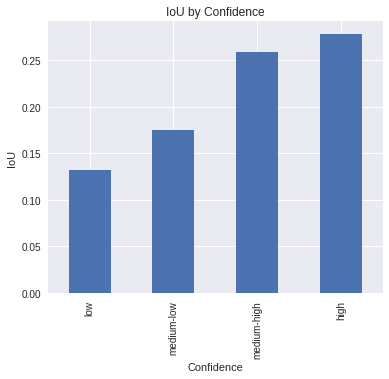

In [9]:
plt.style.use('seaborn')
ious.groupby('confidence_quantiles')['iou'].mean().plot(kind='bar', title='IoU by Confidence', ylabel='IoU',
         xlabel='Confidence', figsize=(6, 5))

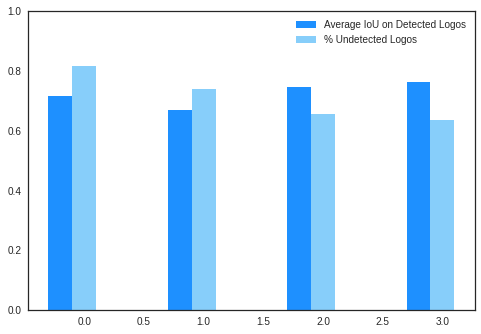

In [10]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

x = np.array([
    0,
    1,
    2,
    3
])

y = [0.715149, 0.6679, 0.746474, 0.761980]
z = [0.814815, 0.738318, 0.654206, 0.635514]

ax = plt.subplot(111)
ax.bar(x-0.2, y, width=0.2, color='dodgerblue', align='center', label='Average IoU on Detected Logos')
ax.bar(x, z, width=0.2, color='lightskyblue', align='center', label='% Undetected Logos')

ax.legend()
plt.ylim(0, 1)

plt.show()


## Analyze Results - Low Confidence vs High Confidence

In [11]:
import cv2 

def draw_bounding_box(input_image):
    
    iou, confidence, path, xmin, xmax, ymin, ymax, xmin_pred, xmax_pred, ymin_pred, ymax_pred = tuple(input_image)
    
    path = 'test_noise/train/images/' + path[:-3] + 'jpg'
    
    print(path)
    
    image = cv2.imread(path) 

    # Blue color in BGR 
    color1 = (255, 0, 0) 
    color2 = (0, 255, 0)

    # Line thickness of 2 px 
    thickness = 2
    
    print("IoU is", iou)
    print("Confidence is", confidence)

    # Using cv2.rectangle() method 
    # Draw a rectangle with blue line borders of thickness of 2 px 
    cv2.rectangle(image, (xmin, ymin), (xmax, ymax), color1, thickness) 
    cv2.putText(image, 'True', (xmin, ymin-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color1 , 2)
    
    cv2.rectangle(image, (xmin_pred, ymin_pred), (xmax_pred, ymax_pred), color2, thickness)
    cv2.putText(image, 'Predicted', (xmin_pred, ymin_pred-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color2, 2)
    
    plt.imshow(image)
    
    plt.grid(False)

In [12]:
ious[(ious['iou'] < 0.7) & (ious['iou'] > 0.4)]

iou label  confidence  \
15   0.639574   494     0.39320   
38   0.652812   205     0.45020   
84   0.573372   324     0.28250   
128  0.669164   418     0.34942   
179  0.446368   180     0.30017   
320  0.694589   960     0.59165   

                                                 image  xmin_true  xmax_true  \
15   charlotte_1453248762196624872_20170218_jpg.rf....        162        428   
38   charlotte_1748321209885418539_20180402_jpg.rf....          4        628   
84   chicago_1529969265678083363_20170604_jpg.rf.71...        224        522   
128  cleveland_1526598447870934171_20170531_jpg.rf....        474        558   
179  houston_1594420676907565064_20170901_jpg.rf.ae...        576        639   
320  london_1905727010673822451_20181105_jpg.rf.847...        335        425   

     ymin_true  ymax_true  xmin_pred  xmax_pred  ymin_pred  ymax_pred  \
15         273        589        181        421        288        512   
38          14        206          0        574          1        275   
84         199        273        229        447        203        261   
128         78        115        491        561         78        110   
179        472        604        581        639        510        574   
320        157        246        330        454        157        250   

    confidence_quantiles  
15            medium-low  
38            medium-low  
84                   low  
128           medium-low  
179                  low  
320          medium-high

test_noise/train/images/charlotte_1453248762196624872_20170218_jpg.rf.e063778e183ae1a3f2678b2aae6eb0be.jpg
IoU is 0.6395736175882745
Confidence is 0.3932


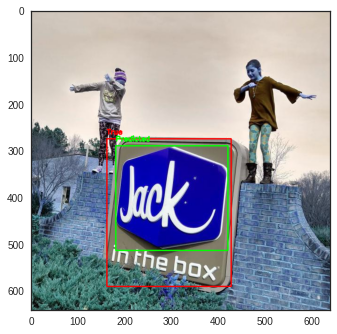

In [13]:
draw_bounding_box(ious.iloc[15].drop(['label', 'confidence_quantiles']).to_list())

test_noise/train/images/charlotte_1748321209885418539_20180402_jpg.rf.df7d82cd42664cbf711395dd8180491e.jpg
IoU is 0.6528119109541648
Confidence is 0.4502


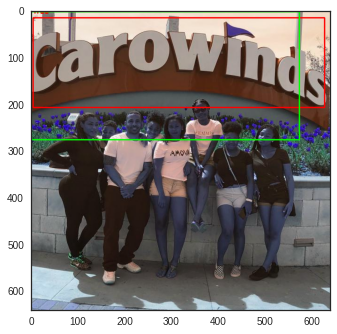

In [14]:
draw_bounding_box(ious.iloc[38].drop(['label', 'confidence_quantiles']).to_list())

test_noise/train/images/chicago_1529969265678083363_20170604_jpg.rf.71ef5c11919ba72c02cc6c338d18aba5.jpg
IoU is 0.5733720297478687
Confidence is 0.2825


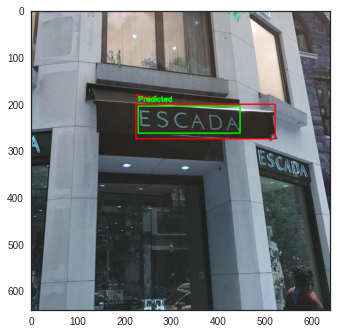

In [15]:
draw_bounding_box(ious.iloc[84].drop(['label', 'confidence_quantiles']).to_list())

In [16]:
ious[(ious['confidence_quantiles'] == 'high') & ious['iou'] > 0.5].sort_values('confidence', ascending=False)

iou label  confidence  \
115  0.931370   370     0.93370   
110  0.922198  1040     0.92541   
200  0.899830   714     0.91452   
226  0.158730  1046     0.91174   
6    0.899121    23     0.91130   
239  0.944847    23     0.90844   
265  0.915723   714     0.90158   
211  0.939904   854     0.89946   
8    0.837029   714     0.89893   
89   0.938368   611     0.89744   
108  0.852021  1040     0.89346   
336  0.917027   281     0.89008   
201  0.388662   644     0.88727   
42   0.957447   980     0.88396   
272  0.837540   980     0.87828   
377  0.864157   611     0.87539   
327  0.137582  1192     0.87163   
46   0.985714   251     0.87155   
423  0.915349   714     0.86664   
277  0.934505  1120     0.83582   
52   0.919505   702     0.82407   
261  0.892006  1008     0.81625   
347  0.869159    40     0.81548   
224  0.913485   714     0.81543   
308  0.735647   150     0.81068   
199  0.270016   644     0.80053   
13   0.834243    30     0.79558   
416  0.910868     3     0.79057   
348  0.901024   451     0.78631   
346  0.161161    65     0.78600   
74   0.926067   388     0.78500   
345  0.933232    97     0.76333   
67   0.914151   637     0.75047   
337  0.948575   953     0.74866   
325  0.201023    65     0.74102   
29   0.829475   904     0.71920   
58   0.073980  1110     0.71478   
284  0.365040   451     0.71308   
241  0.941423  1065     0.71121   

                                                 image  xmin_true  xmax_true  \
115  cleveland_1110146234147317798_20151103_jpg.rf....        117        243   
110  chicago_1788700426096724880_20180527_jpg.rf.5f...        151        352   
200  houston_1767670061085962086_20180428_jpg.rf.cb...        386        448   
226  la_1155097505861123339_20160104_jpg.rf.3ec7050...        432        621   
6    charlotte_1287398713694500251_20160705_jpg.rf....        103        158   
239  la_1241424587788089138_20160502_jpg.rf.a241fcc...        409        484   
265  la_2017_1506880601914001225_20170503_jpg.rf.66...        554        606   
211  houston_1862830573806954380_20180907_jpg.rf.48...        518        620   
8    charlotte_1325374360021815430_20160826_jpg.rf....        382        441   
89   chicago_1566975091613481179_20170725_jpg.rf.8d...        273        320   
108  chicago_1778803985312834563_20180514_jpg.rf.9e...        185        414   
336  miami_1395865661502501154_20161201_jpg.rf.af15...         61        103   
201  houston_1780780055431987628_20180516_jpg.rf.84...        351        444   
42   charlotte_1786475448134448263_20180524_jpg.rf....        230        293   
272  la_2017_1545985663588749555_20170626_jpg.rf.c9...        436        509   
377  miami_1743299228442093140_20180326_jpg.rf.57fc...        361        395   
327  miami_1176849193135514076_20160203_jpg.rf.2694...        488        619   
46   charlotte_1908527664575462217_20181109_jpg.rf....        282        358   
423  phoenix_1879105882371859902_20180929_jpg.rf.72...         47         88   
277  la_2017_1558875959452938842_20170714_jpg.rf.69...        319        358   
52   chicago_1008797255580815610_20150616_jpg.rf.76...         10         76   
261  la_2017_1491252604573933922_20170412_jpg.rf.af...         34         87   
347  miami_1486340623962505061_20170405_jpg.rf.14b9...        300        363   
224  la_1128096555250337884_20151128_jpg.rf.f3b17f1...        393        436   
308  london_1861122626166390104_20180904_jpg.rf.5a0...        349        479   
199  houston_1748725320556618075_20180402_jpg.rf.24...        435        539   
13   charlotte_1434519211241331744_20170124_jpg.rf....        359        400   
416  phoenix_1777893793981119510_20180512_jpg.rf.cd...        435        507   
348  miami_1489254533099698459_20170409_jpg.rf.8524...        406        456   
346  miami_1479899410011164730_20170327_jpg.rf.82f2...        393        504   
74   chicago_1375192077226272400_20161103_jpg.rf.55...         69        231   
345  miami_1470430350936529024_20170314_jpg.rf.2c

test_noise/train/images/cleveland_1110146234147317798_20151103_jpg.rf.6d03472100bdaa97ac62afc9d9300f27.jpg
IoU is 0.9313701923076924
Confidence is 0.9337


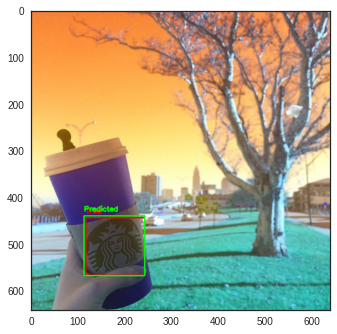

In [17]:
draw_bounding_box(ious.iloc[115].drop(['label', 'confidence_quantiles']).to_list())

test_noise/train/images/charlotte_1325374360021815430_20160826_jpg.rf.d94d34e3d2841a85a580fb7228651d10.jpg
IoU is 0.8370285056147423
Confidence is 0.89893


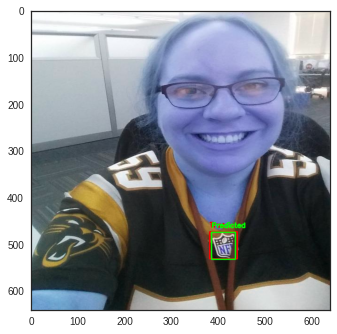

In [18]:
draw_bounding_box(ious.iloc[8].drop(['label', 'confidence_quantiles']).to_list())

test_noise/train/images/la_1087583019988380509_20151003_jpg.rf.7500aba03e27c610f82812547d28dde4.jpg
IoU is 0.0
Confidence is 0.79484


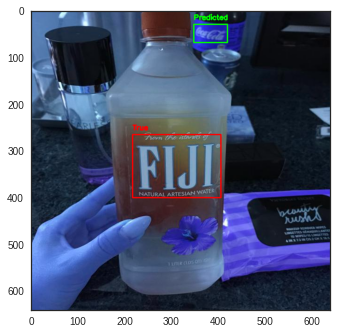

In [19]:
draw_bounding_box(ious.iloc[220].drop(['label', 'confidence_quantiles']).to_list())

test_noise/train/images/la_1155097505861123339_20160104_jpg.rf.3ec70506ca9cfb42d110fa3bdcd148c7.jpg
IoU is 0.15873015873015872
Confidence is 0.91174


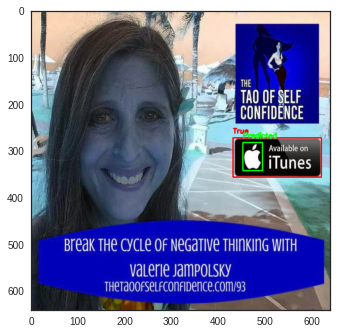

In [20]:
draw_bounding_box(ious.iloc[226].drop(['label', 'confidence_quantiles']).to_list())

test_noise/train/images/houston_1862830573806954380_20180907_jpg.rf.486186e8c9a6f4c80f5ae7cb62f333e0.jpg
IoU is 0.9399038461538461
Confidence is 0.89946


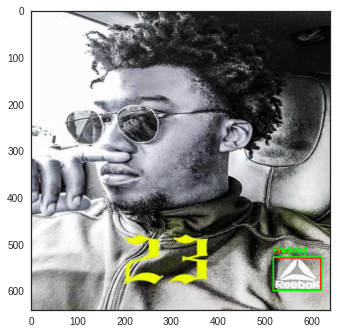

In [21]:
draw_bounding_box(ious.iloc[211].drop(['label', 'confidence_quantiles']).to_list())

test_noise/train/images/houston_1532824619487222027_20170608_jpg.rf.808631065c1bdba4f72a75a301eb0621.jpg
IoU is 0.9214659685863874
Confidence is 0.27167


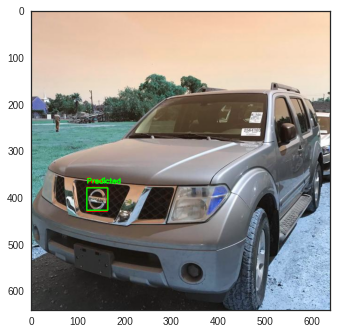

In [22]:
draw_bounding_box(ious.iloc[170].drop(['label', 'confidence_quantiles']).to_list())

test_noise/train/images/houston_1594420676907565064_20170901_jpg.rf.ae71985a82094c875cf5e7b4788ed4f1.jpg
IoU is 0.44636844636844636
Confidence is 0.30017


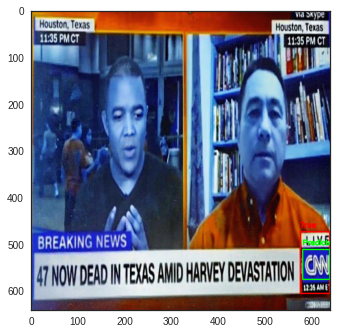

In [23]:
draw_bounding_box(ious.iloc[179].drop(['label', 'confidence_quantiles']).to_list())

test_noise/train/images/la_2017_1477345132672311519_20170324_jpg.rf.6013e41bfd4abee9376a9106daeae48c.jpg
IoU is 0.9393939393939394
Confidence is 0.31221


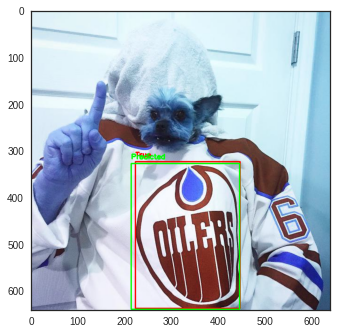

In [24]:
draw_bounding_box(ious.iloc[258].drop(['label', 'confidence_quantiles']).to_list())

test_noise/train/images/la_2017_1594050154608456206_20170901_jpg.rf.970e9a1685cd3cb3cee0f43b7f8b105a.jpg
IoU is 0.365040365040365
Confidence is 0.71308


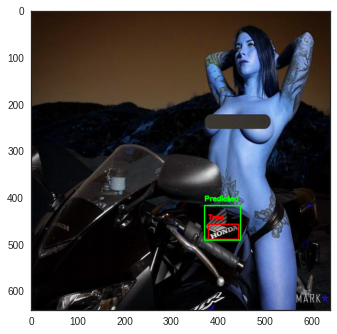

In [25]:
draw_bounding_box(ious.iloc[284].drop(['label', 'confidence_quantiles']).to_list())

test_noise/train/images/miami_1479899410011164730_20170327_jpg.rf.82f26be89b136a9e99ac7e27f181b633.jpg
IoU is 0.16116116116116116
Confidence is 0.786


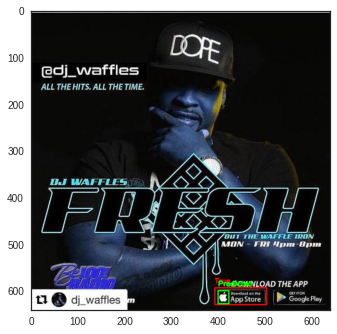

In [26]:
draw_bounding_box(ious.iloc[346].drop(['label', 'confidence_quantiles']).to_list())

In [27]:
ious[(ious['confidence_quantiles'] == 'low') & ious['iou'] > 0.5]

iou label  confidence  \
43   0.825000   861     0.27572   
44   0.893907   946     0.33646   
84   0.573372   324     0.28250   
85   0.775391   395     0.30831   
144  0.961465    30     0.27530   
170  0.921466   726     0.27167   
179  0.446368   180     0.30017   
181  0.939545   459     0.32409   
203  0.845306   459     0.29440   
243  0.794872  1117     0.27326   
258  0.939394   315     0.31221   
275  0.067356   866     0.25930   
276  0.920361   246     0.33100   
351  0.058038   862     0.31249   
366  0.796465  1039     0.33050   
368  0.900556  1120     0.27402   
373  0.023680   807     0.33863   
378  0.964912    96     0.30073   
385  0.893032  1154     0.29650   
388  0.762500   786     0.31774   

                                                 image  xmin_true  xmax_true  \
43   charlotte_1796924853846866043_20180608_jpg.rf....        260        332   
44   charlotte_1817860948426420741_20180707_jpg.rf....        344        406   
84   chicago_1529969265678083363_20170604_jpg.rf.71...        224        522   
85   chicago_1535825151337511929_20170612_jpg.rf.4c...         99        208   
144  houston_1181859919134431223_20160210_jpg.rf.8a...        398        443   
170  houston_1532824619487222027_20170608_jpg.rf.80...        119        163   
179  houston_1594420676907565064_20170901_jpg.rf.ae...        576        639   
181  houston_1614268359011285427_20170929_jpg.rf.e4...        493        613   
203  houston_1793315496046014873_20180603_jpg.rf.4b...         32        545   
243  la_1284869123423863037_20160701_jpg.rf.ce1667a...        104        139   
258  la_2017_1477345132672311519_20170324_jpg.rf.60...        223        447   
275  la_2017_1549291066350470723_20170701_jpg.rf.d5...        433        479   
276  la_2017_1551850747767568683_20170705_jpg.rf.82...        231        302   
351  miami_1496803314763280623_20170420_jpg.rf.e9e9...         32        639   
366  miami_1655260455294111064_20171124_jpg.rf.475a...        329        505   
368  miami_1673756913743066950_20171220_jpg.rf.f1f4...        542        620   
373  miami_1727770326148829999_20180304_jpg.rf.c5e1...          0        626   
378  miami_1744663646230678604_20180328_jpg.rf.fda5...        226        282   
385  miami_1827506160383578357_20180720_jpg.rf.1e06...        219        344   
388  miami_1836430844393152160_20180801_jpg.rf.84b5...        267        332   

     ymin_true  ymax_true  xmin_pred  xmax_pred  ymin_pred  ymax_pred  \
43         593        637        255        335        591        639   
44         437        482        348        406        438        481   
84         199        273        229        447        203        261   
85         427        636         93        223        413        639   
144        160        217        397        443        160        216   
170        377        428        119        164        378        426   
179        472        604        581        639        510        574   
181        244        354        495        612        245        351   
203          0        327         20        587          0        350   
243        240        279        104        139        246        277   
258        322        636        214        446        326        638   
275         69        118        375        553         37        225   
276        255        292        230        301        256        291   
351         18        306        298        476         32         89   
366        345        435        339        505        355        431   
368         60        130        546        622         59        131   
373         15        611        144        239        401        494   
378        510        569        227        283        510        569   
385        524        639        218        341        524        630   
388        160        192        269        330        165        191   

    confidence_quantiles  
43                   low  
44   

test_noise/train/images/miami_1655260455294111064_20171124_jpg.rf.475ad911800ada18cccfb35ae984ac86.jpg
IoU is 0.7964646464646464
Confidence is 0.3305


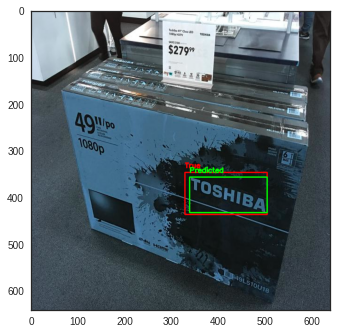

In [28]:
draw_bounding_box(ious.iloc[366].drop(['label', 'confidence_quantiles']).to_list())

In [30]:
ious.head()

iou label  confidence                                              image  \
0  0.0   697     0.58243  charlotte_1122851793886401988_20151121_jpg.rf....   
1  0.0   755     0.37900  charlotte_1123562859839451256_20151122_jpg.rf....   
2  0.0   492     0.31036  charlotte_1194770380790211088_20160228_jpg.rf....   
3  0.0   470     0.32764  charlotte_1221761855423481093_20160405_jpg.rf....   
4  0.0   567     0.39640  charlotte_1240888932309606289_20160501_jpg.rf....   

   xmin_true  xmax_true  ymin_true  ymax_true  xmin_pred  xmax_pred  \
0        270        357        193        237        608        640   
1         45        165         74        177        431        468   
2        535        600        137        181        109        162   
3        358        551        237        278        110        142   
4          3         77        379        500        262        282   

   ymin_pred  ymax_pred confidence_quantiles  
0         58         89          medium-high  
1        525        551           medium-low  
2        248        272                  low  
3          0         39                  low  
4        231        251           medium-low

In [31]:
loc_pics = ious[ious['iou'] != 0]
loc_pics.head()

iou label  confidence  \
6   0.899121    23     0.91130   
8   0.837029   714     0.89893   
13  0.834243    30     0.79558   
14  0.925241    70     0.46746   
15  0.639574   494     0.39320   

                                                image  xmin_true  xmax_true  \
6   charlotte_1287398713694500251_20160705_jpg.rf....        103        158   
8   charlotte_1325374360021815430_20160826_jpg.rf....        382        441   
13  charlotte_1434519211241331744_20170124_jpg.rf....        359        400   
14  charlotte_1445103968953890465_20170207_jpg.rf....        258        334   
15  charlotte_1453248762196624872_20170218_jpg.rf....        162        428   

    ymin_true  ymax_true  xmin_pred  xmax_pred  ymin_pred  ymax_pred  \
6         512        571        105        159        514        570   
8         472        530        386        437        473        531   
13        259        303        358        401        256        300   
14        107        158        259        336        108        159   
15        273        589        181        421        288        512   

   confidence_quantiles  
6                  high  
8                  high  
13                 high  
14           medium-low  
15           medium-low

In [32]:
loc_pics.shape

(124, 13)

In [69]:
confidences = sorted(list(set(loc_pics['confidence'])))[20:-20]

from sklearn.metrics import mutual_info_score

In [72]:
np.random.choice([2, 3, 4, 5, 6], 2)

array([5, 5])

In [101]:
confidences[14:]

[0.40092,
 0.40468,
 0.40919,
 0.41096,
 0.41791,
 0.42328,
 0.4286,
 0.42876,
 0.43356,
 0.43461,
 0.43561,
 0.44279,
 0.4502,
 0.46746,
 0.48335,
 0.49139,
 0.49412,
 0.5036,
 0.51733,
 0.52251,
 0.52719,
 0.52753,
 0.53187,
 0.5376,
 0.5526,
 0.55307,
 0.56529,
 0.5664,
 0.575,
 0.57989,
 0.5836,
 0.59165,
 0.60042,
 0.61011,
 0.61215,
 0.61607,
 0.61622,
 0.62219,
 0.62249,
 0.63122,
 0.64231,
 0.6428,
 0.65194,
 0.65892,
 0.66478,
 0.6742,
 0.67735,
 0.69156,
 0.69243,
 0.70114,
 0.70899,
 0.71121,
 0.71308,
 0.71478,
 0.7192,
 0.74102,
 0.74866,
 0.75047,
 0.76333,
 0.785,
 0.786,
 0.78631,
 0.79057,
 0.79558,
 0.80053,
 0.81068,
 0.81543,
 0.81548,
 0.81625,
 0.82407]

In [73]:
KL = dict()
for c in confidences:
    array_1 = loc_pics.loc[loc_pics['confidence'] >= c, 'iou'].sort_values().to_list()
    array_2 = loc_pics.loc[loc_pics['confidence'] < c, 'iou'].sort_values().to_list()
        
    if len(array_1) < len(array_2):
        array_2 = np.random.choice(array_2, len(array_1))
    
    else:
        array_1 = np.random.choice(array_1, len(array_2))
    
    KL[c] = mutual_info_score(array_1,array_2)

/anaconda/envs/py38_default/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/anaconda/envs/py38_default/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/anaconda/envs/py38_default/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/anaconda/envs/py38_default/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continu

In [75]:
max(KL, key=KL.get)

0.57989

/anaconda/envs/py38_default/lib/python3.8/site-packages/seaborn/distributions.py:967: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout = self.ax.fill_between([], [], **plot_kws)
/anaconda/envs/py38_default/lib/python3.8/site-packages/seaborn/distributions.py:1015: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  artist = ax.fill_between(
/anaconda/envs/py38_default/lib/python3.8/site-packages/seaborn/distributions.py:967: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout = self.ax.fill_between([], [], **plot_kws)
/anaconda/envs/py38_default/lib/python3.8/site-packages/seaborn/distributions.py:1015: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor rel

/anaconda/envs/py38_default/lib/python3.8/site-packages/seaborn/distributions.py:967: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout = self.ax.fill_between([], [], **plot_kws)
/anaconda/envs/py38_default/lib/python3.8/site-packages/seaborn/distributions.py:1015: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  artist = ax.fill_between(
/anaconda/envs/py38_default/lib/python3.8/site-packages/seaborn/distributions.py:967: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout = self.ax.fill_between([], [], **plot_kws)
/anaconda/envs/py38_default/lib/python3.8/site-packages/seaborn/distributions.py:1015: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor rel

/anaconda/envs/py38_default/lib/python3.8/site-packages/seaborn/distributions.py:967: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout = self.ax.fill_between([], [], **plot_kws)
/anaconda/envs/py38_default/lib/python3.8/site-packages/seaborn/distributions.py:1015: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  artist = ax.fill_between(
/anaconda/envs/py38_default/lib/python3.8/site-packages/seaborn/distributions.py:967: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout = self.ax.fill_between([], [], **plot_kws)
/anaconda/envs/py38_default/lib/python3.8/site-packages/seaborn/distributions.py:1015: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor rel

/anaconda/envs/py38_default/lib/python3.8/site-packages/seaborn/distributions.py:967: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout = self.ax.fill_between([], [], **plot_kws)
/anaconda/envs/py38_default/lib/python3.8/site-packages/seaborn/distributions.py:1015: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  artist = ax.fill_between(
/anaconda/envs/py38_default/lib/python3.8/site-packages/seaborn/distributions.py:967: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout = self.ax.fill_between([], [], **plot_kws)
/anaconda/envs/py38_default/lib/python3.8/site-packages/seaborn/distributions.py:1015: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor rel

/anaconda/envs/py38_default/lib/python3.8/site-packages/seaborn/distributions.py:967: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout = self.ax.fill_between([], [], **plot_kws)
/anaconda/envs/py38_default/lib/python3.8/site-packages/seaborn/distributions.py:1015: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  artist = ax.fill_between(
/anaconda/envs/py38_default/lib/python3.8/site-packages/seaborn/distributions.py:967: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout = self.ax.fill_between([], [], **plot_kws)
/anaconda/envs/py38_default/lib/python3.8/site-packages/seaborn/distributions.py:1015: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor rel

/anaconda/envs/py38_default/lib/python3.8/site-packages/seaborn/distributions.py:967: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout = self.ax.fill_between([], [], **plot_kws)
/anaconda/envs/py38_default/lib/python3.8/site-packages/seaborn/distributions.py:1015: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  artist = ax.fill_between(
/anaconda/envs/py38_default/lib/python3.8/site-packages/seaborn/distributions.py:967: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout = self.ax.fill_between([], [], **plot_kws)
/anaconda/envs/py38_default/lib/python3.8/site-packages/seaborn/distributions.py:1015: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor rel

/anaconda/envs/py38_default/lib/python3.8/site-packages/seaborn/distributions.py:967: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout = self.ax.fill_between([], [], **plot_kws)
/anaconda/envs/py38_default/lib/python3.8/site-packages/seaborn/distributions.py:1015: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  artist = ax.fill_between(
/anaconda/envs/py38_default/lib/python3.8/site-packages/seaborn/distributions.py:967: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout = self.ax.fill_between([], [], **plot_kws)
/anaconda/envs/py38_default/lib/python3.8/site-packages/seaborn/distributions.py:1015: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor rel

/anaconda/envs/py38_default/lib/python3.8/site-packages/seaborn/distributions.py:967: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout = self.ax.fill_between([], [], **plot_kws)
/anaconda/envs/py38_default/lib/python3.8/site-packages/seaborn/distributions.py:1015: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  artist = ax.fill_between(
/anaconda/envs/py38_default/lib/python3.8/site-packages/seaborn/distributions.py:967: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout = self.ax.fill_between([], [], **plot_kws)
/anaconda/envs/py38_default/lib/python3.8/site-packages/seaborn/distributions.py:1015: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor rel

/anaconda/envs/py38_default/lib/python3.8/site-packages/seaborn/distributions.py:967: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout = self.ax.fill_between([], [], **plot_kws)
/anaconda/envs/py38_default/lib/python3.8/site-packages/seaborn/distributions.py:1015: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  artist = ax.fill_between(
/anaconda/envs/py38_default/lib/python3.8/site-packages/seaborn/distributions.py:967: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout = self.ax.fill_between([], [], **plot_kws)
/anaconda/envs/py38_default/lib/python3.8/site-packages/seaborn/distributions.py:1015: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor rel

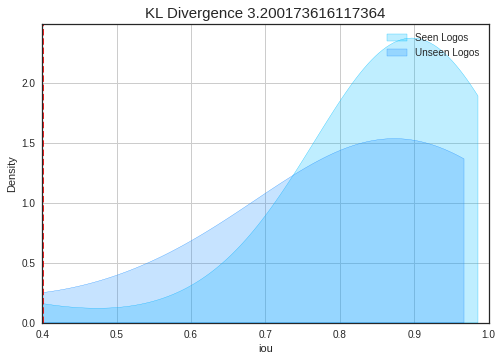

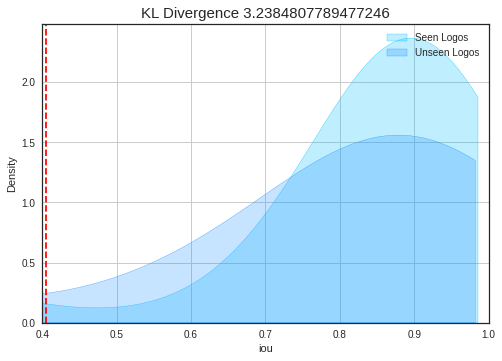

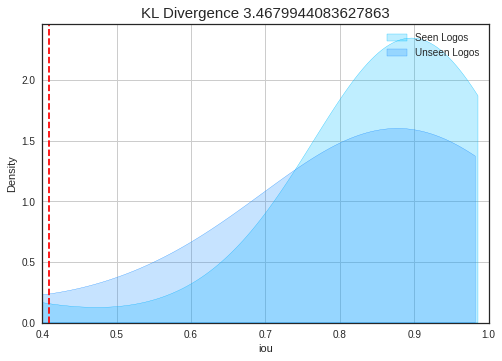

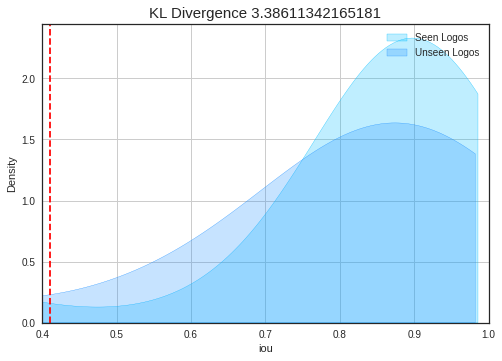

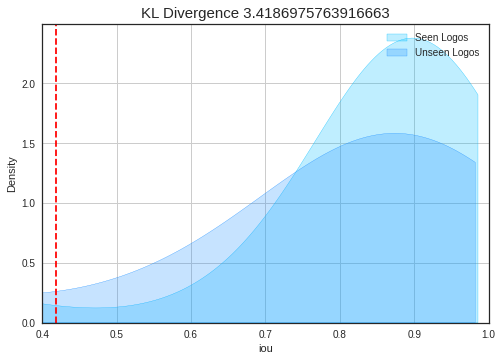

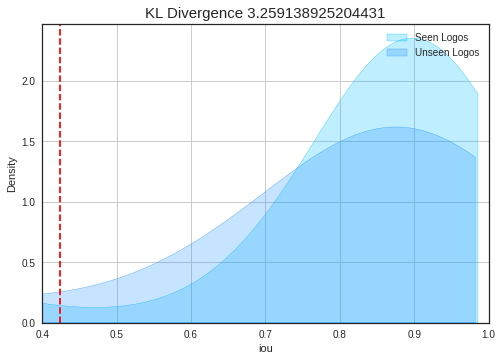

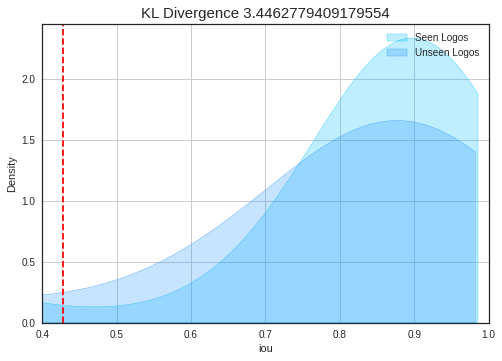

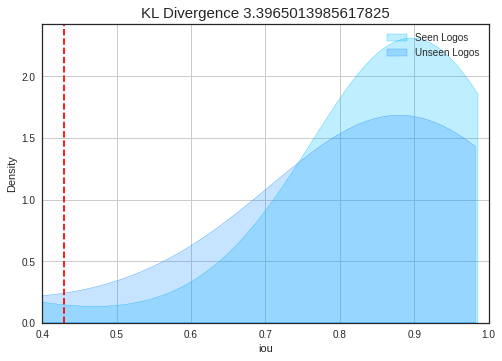

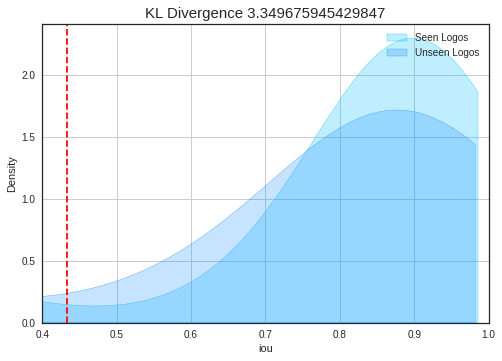

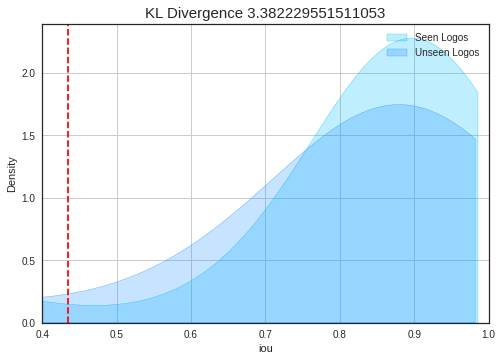

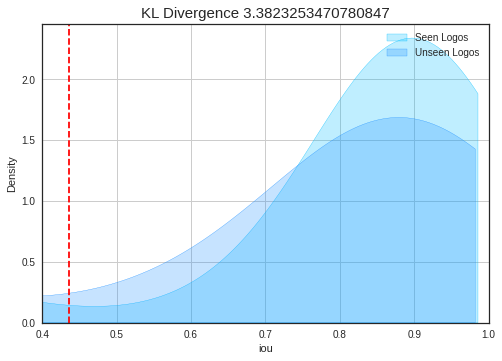

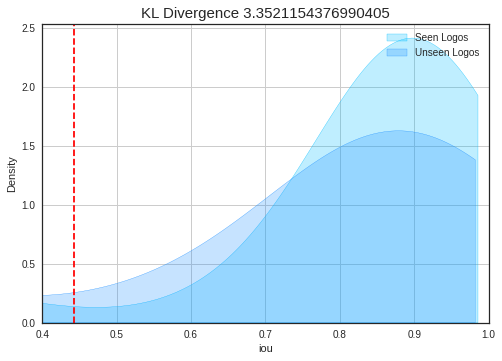

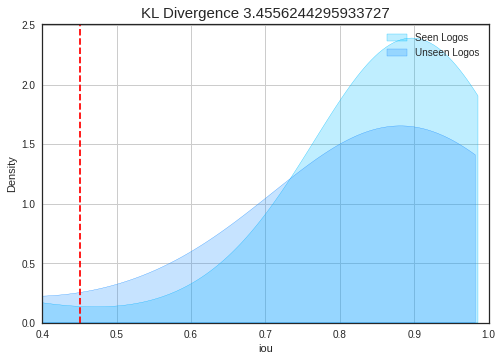

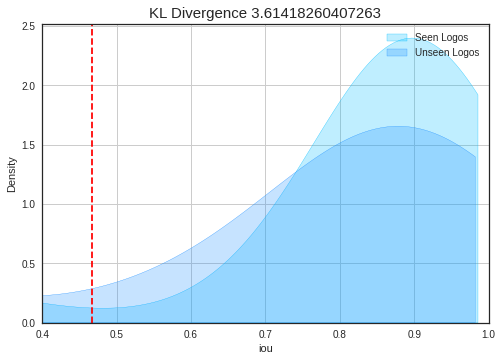

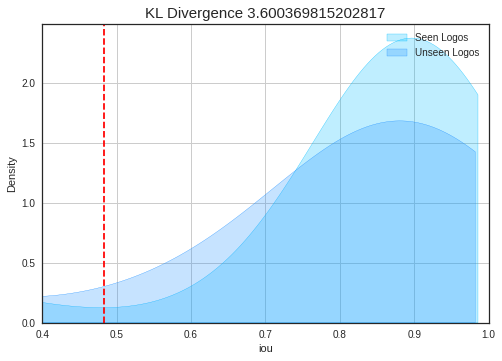

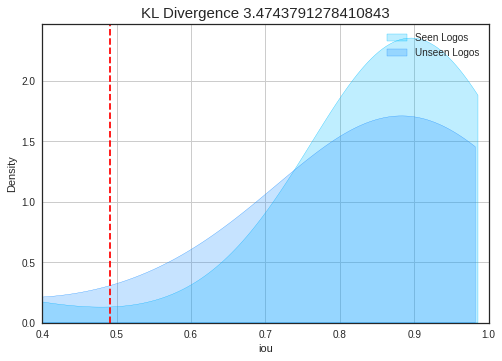

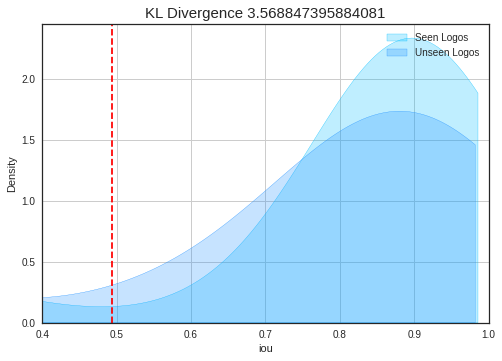

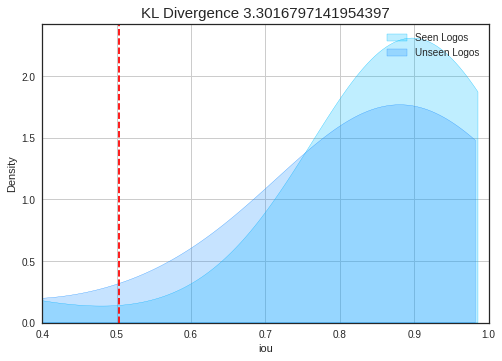

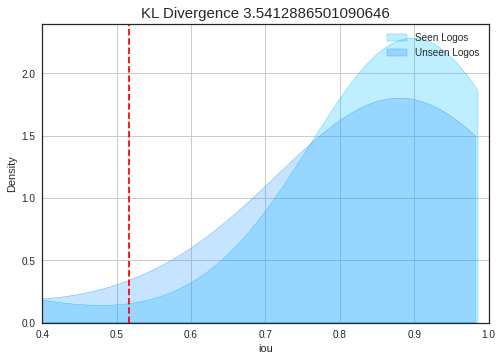

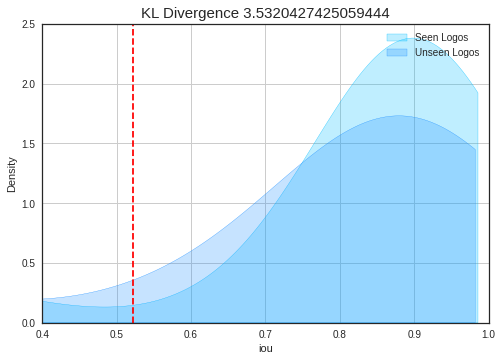

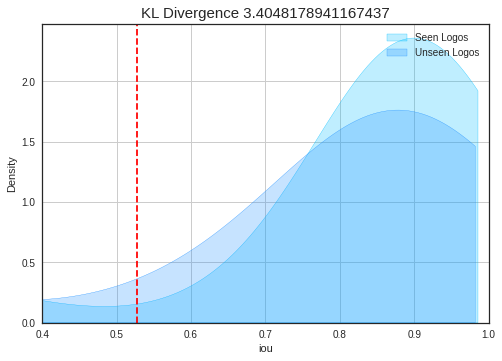

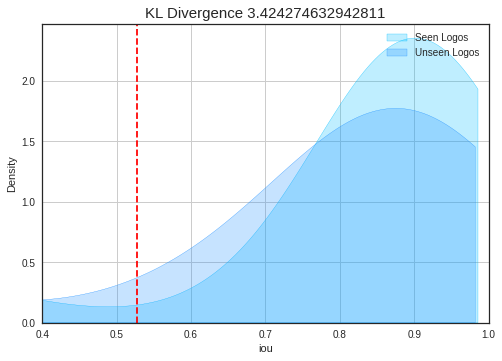

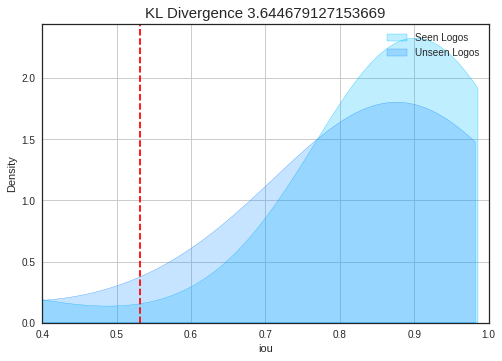

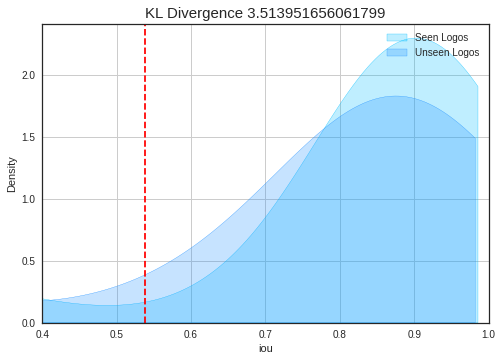

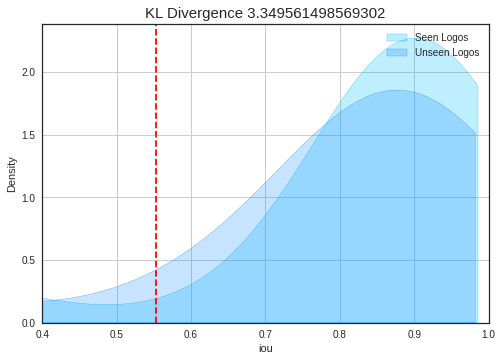

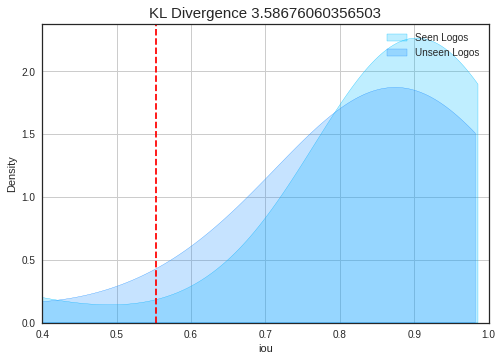

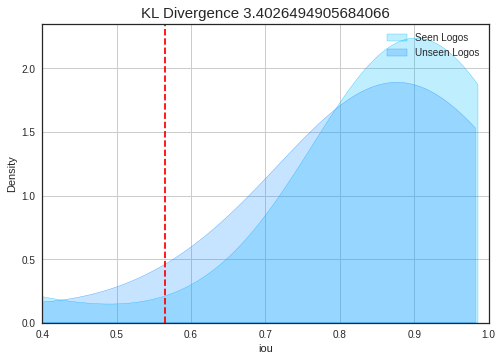

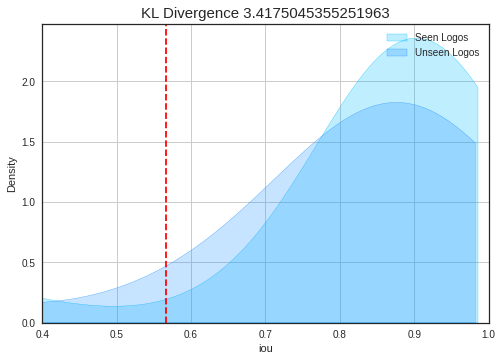

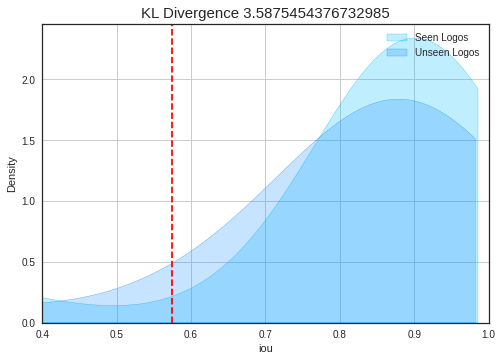

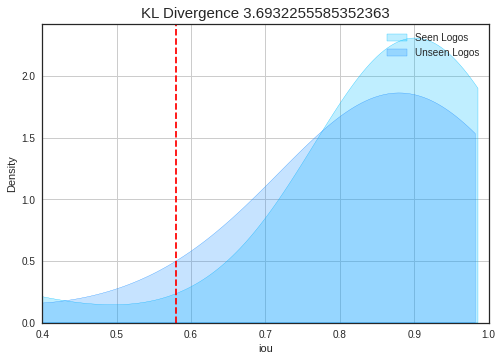

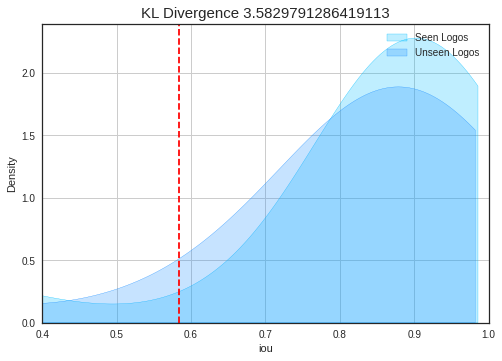

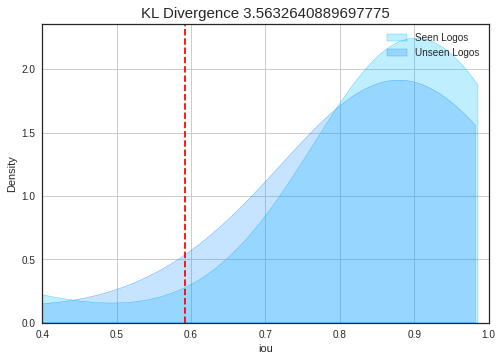

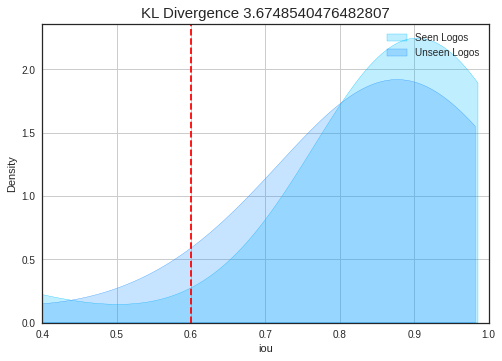

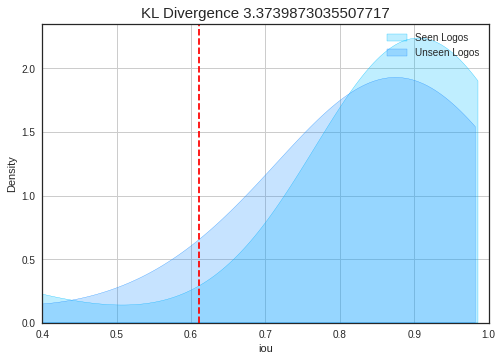

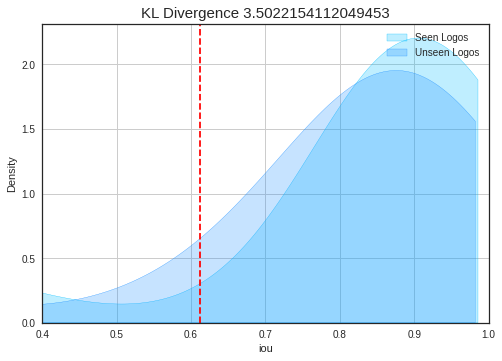

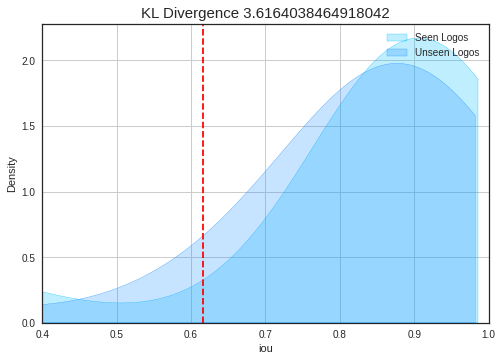

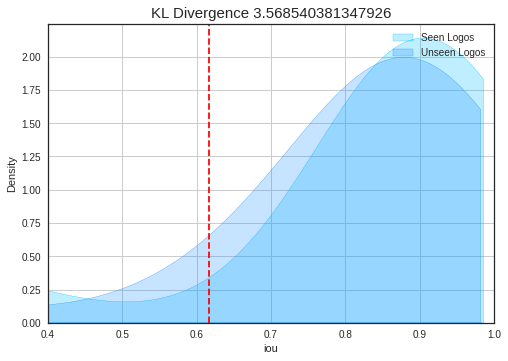

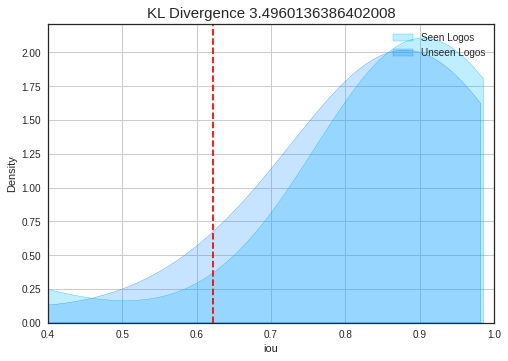

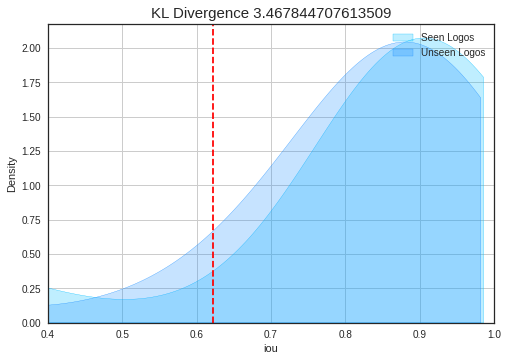

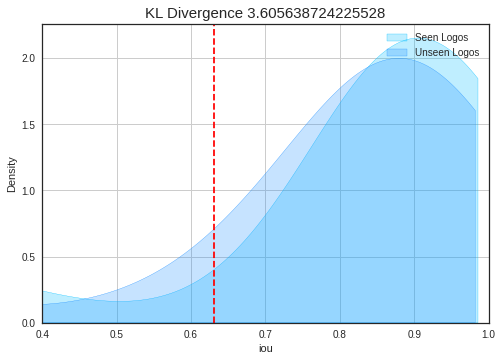

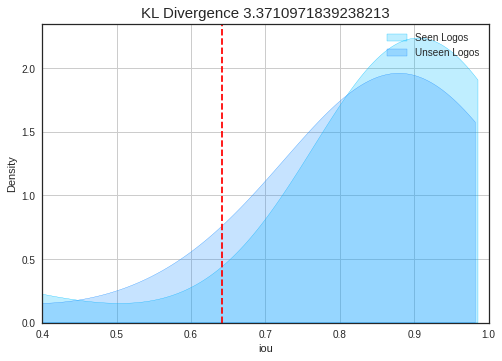

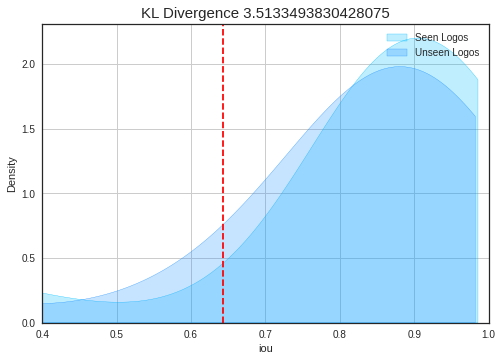

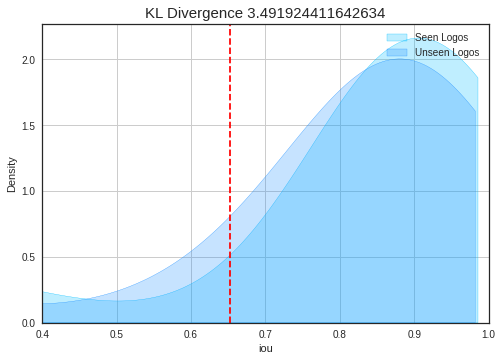

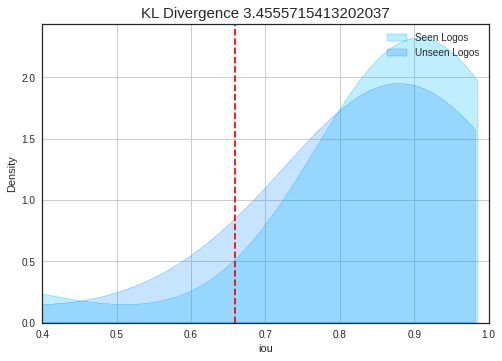

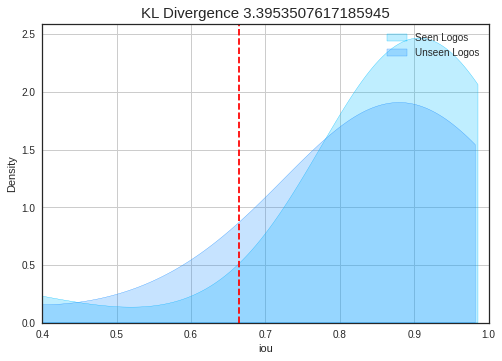

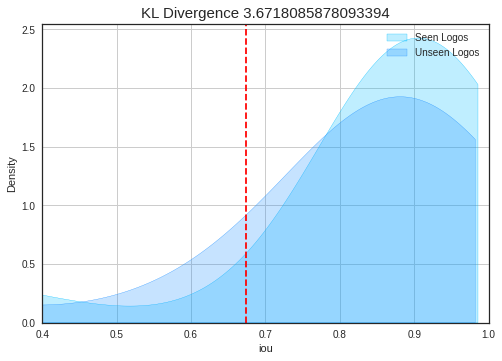

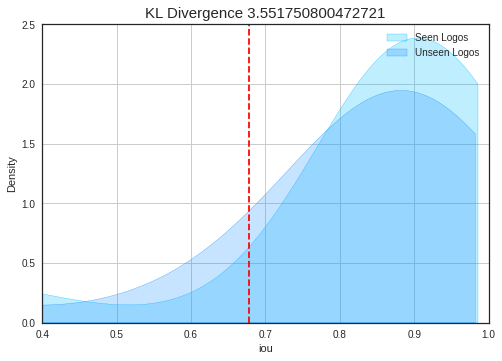

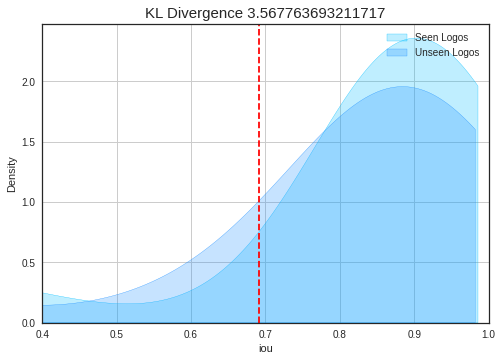

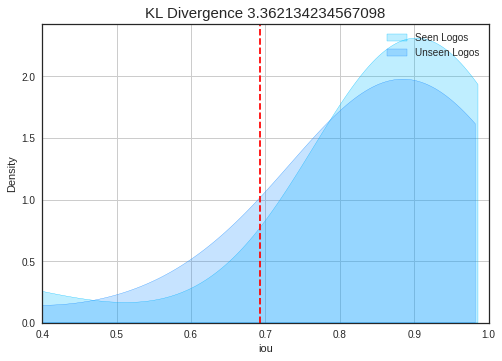

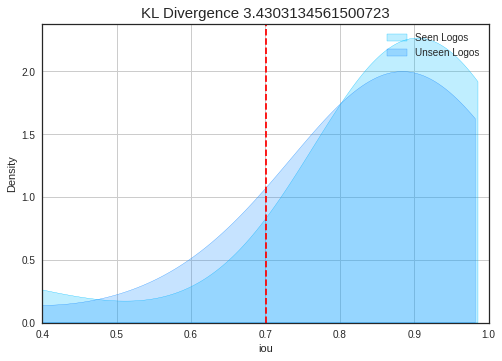

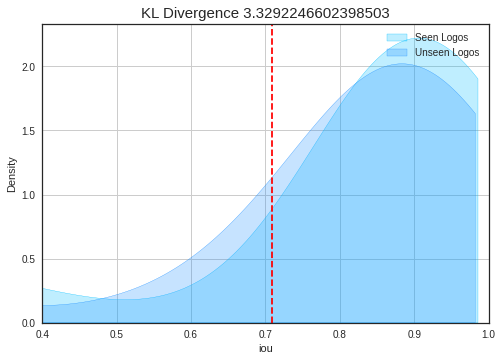

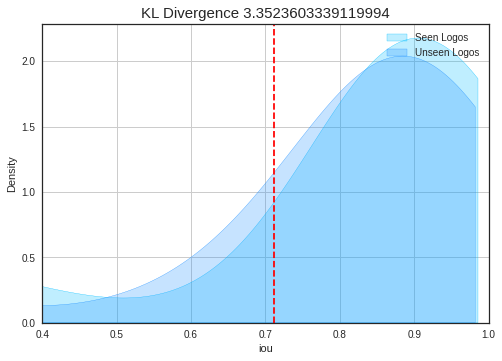

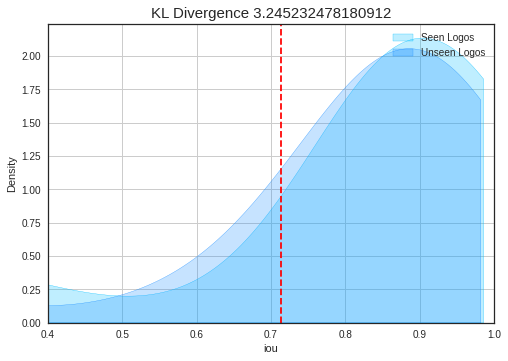

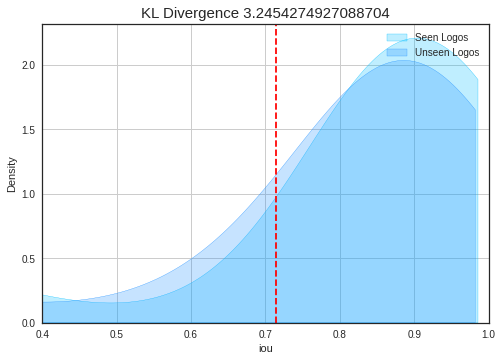

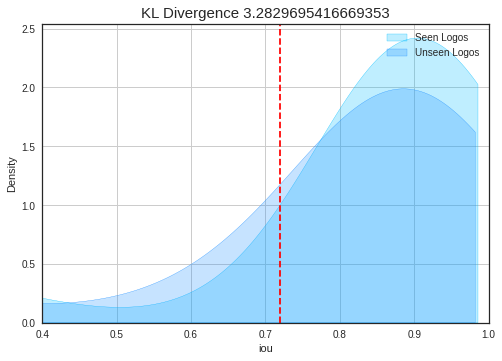

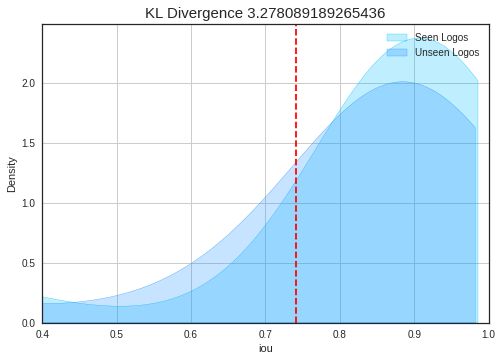

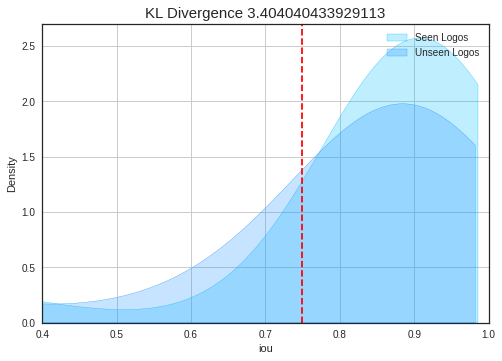

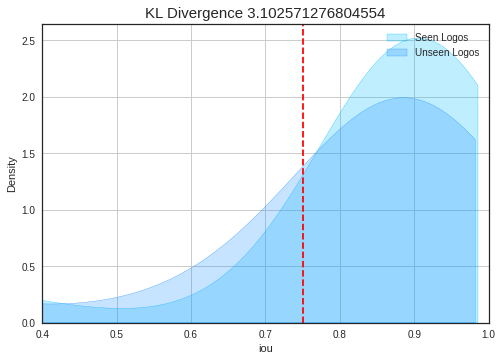

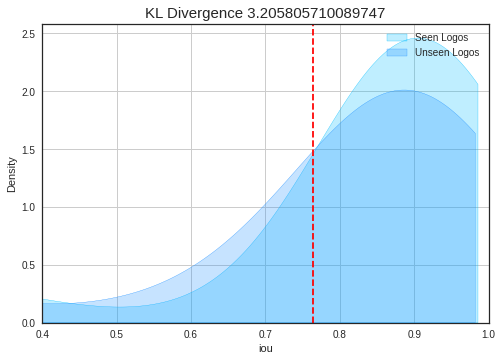

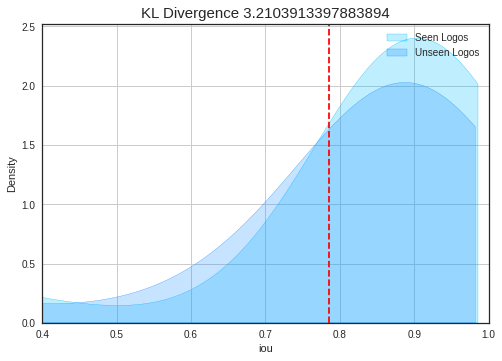

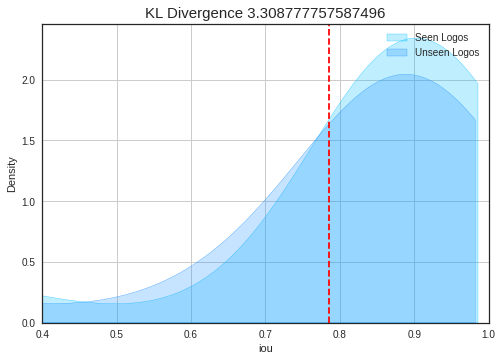

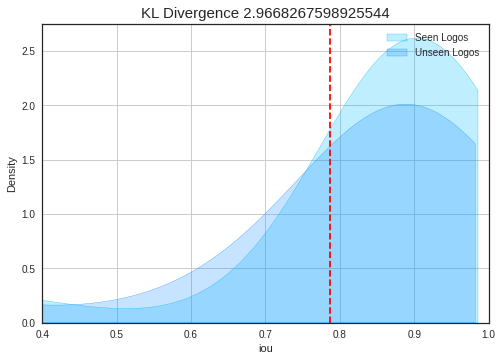

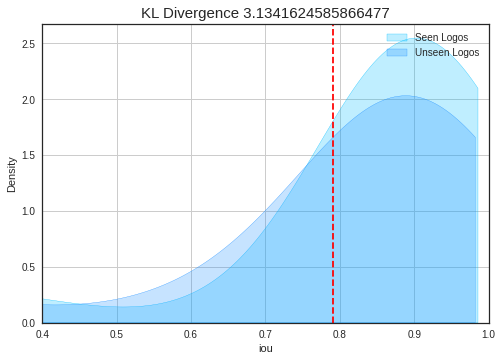

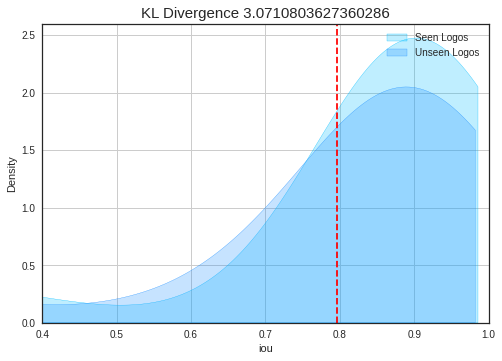

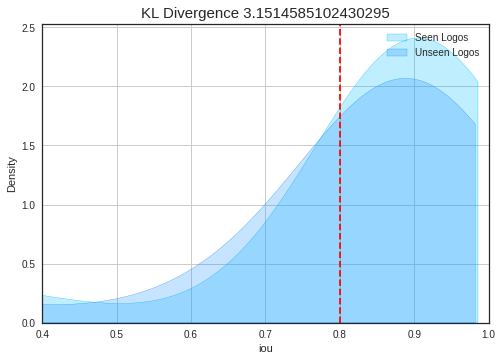

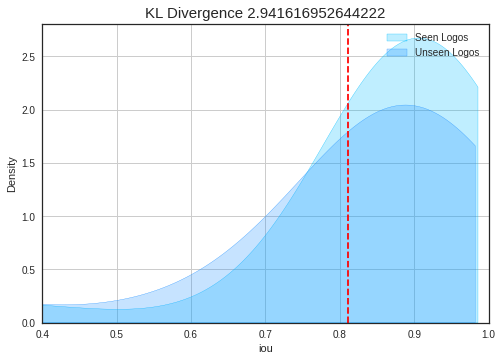

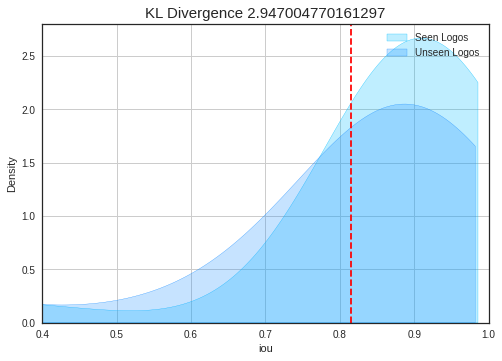

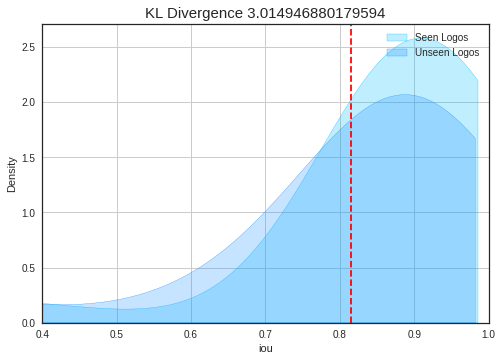

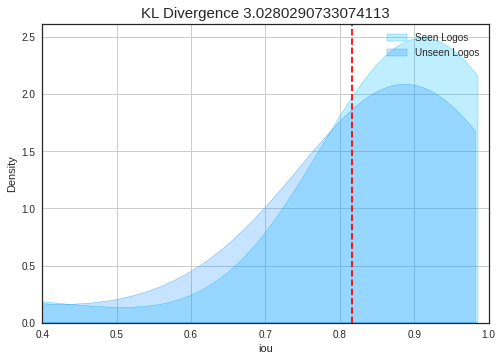

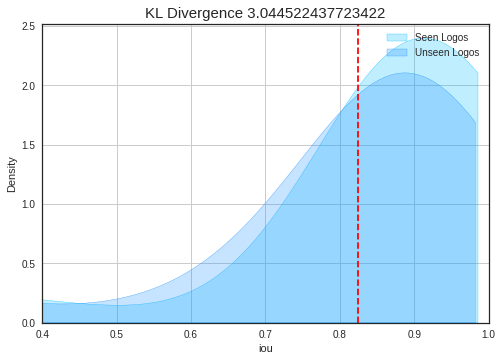

In [102]:
for c in confidences[14:]:
    fig, ax = plt.subplots()
    ax = sns.kdeplot(loc_pics.loc[loc_pics['confidence'] >= c , 'iou'],
                color='deepskyblue',
                shade=True,
                cut=0,
                Label='Seen Logos')

    ax = sns.kdeplot(loc_pics.loc[loc_pics['confidence'] < c , 'iou'],
                color='dodgerblue',
                shade=True,
                cut=0,
                Label='Unseen Logos')

    ax.grid(True)
    ax.set_title(f'KL Divergence {KL[c]}', fontsize=15)
    plt.axvline(x=c, color='red', linestyle='--')
    plt.legend()
    plt.xlim(0.4, 1)
    plt.savefig(f'confidence {c}' + '.jpg')

[0.59165,
 0.70899,
 0.62219,
 0.40468,
 0.56529,
 0.75047,
 0.61011,
 0.80053,
 0.43561,
 0.66478,
 0.65892,
 0.48335,
 0.78631,
 0.82407,
 0.49139,
 0.5376,
 0.4286,
 0.61215,
 0.3932,
 0.60042,
 0.61607,
 0.61622,
 0.74866,
 0.81548,
 0.40092,
 0.49412,
 0.40919,
 0.39528,
 0.7192,
 0.55307,
 0.67735,
 0.74102,
 0.39556,
 0.79558,
 0.64231,
 0.51733,
 0.81625,
 0.5664,
 0.39596,
 0.71121,
 0.79057,
 0.46746,
 0.34942,
 0.37005,
 0.3754,
 0.52719,
 0.5526,
 0.52251,
 0.5036,
 0.63122,
 0.4502,
 0.53187,
 0.6428,
 0.52753,
 0.44279,
 0.69243,
 0.3542,
 0.81543,
 0.34204,
 0.71478,
 0.65194,
 0.575,
 0.42328,
 0.43461,
 0.71308,
 0.42876,
 0.6742,
 0.41096,
 0.5836,
 0.76333,
 0.785,
 0.70114,
 0.62249,
 0.38051,
 0.43356,
 0.37361,
 0.81068,
 0.35768,
 0.57989,
 0.36805,
 0.69156,
 0.786,
 0.41791,
 0.36997]

In [118]:
list1 = glob.glob('*.jpg')
list2 = list(map(lambda x : float(x[11:-4]), glob.glob('*.jpg')))

zipped_lists = zip(list2, list1)


sorted_zipped_lists = sorted(zipped_lists)

sorted_list1 = [element for _, element in sorted_zipped_lists]

print(sorted_list1)

['confidence 0.34204.jpg', 'confidence 0.34942.jpg', 'confidence 0.3542.jpg', 'confidence 0.35768.jpg', 'confidence 0.36805.jpg', 'confidence 0.36997.jpg', 'confidence 0.37005.jpg', 'confidence 0.37361.jpg', 'confidence 0.3754.jpg', 'confidence 0.38051.jpg', 'confidence 0.3932.jpg', 'confidence 0.39528.jpg', 'confidence 0.39556.jpg', 'confidence 0.39596.jpg', 'confidence 0.40092.jpg', 'confidence 0.40468.jpg', 'confidence 0.40919.jpg', 'confidence 0.41096.jpg', 'confidence 0.41791.jpg', 'confidence 0.42328.jpg', 'confidence 0.4286.jpg', 'confidence 0.42876.jpg', 'confidence 0.43356.jpg', 'confidence 0.43461.jpg', 'confidence 0.43561.jpg', 'confidence 0.44279.jpg', 'confidence 0.4502.jpg', 'confidence 0.46746.jpg', 'confidence 0.48335.jpg', 'confidence 0.49139.jpg', 'confidence 0.49412.jpg', 'confidence 0.5036.jpg', 'confidence 0.51733.jpg', 'confidence 0.52251.jpg', 'confidence 0.52719.jpg', 'confidence 0.52753.jpg', 'confidence 0.53187.jpg', 'confidence 0.5376.jpg', 'confidence 0.5526

In [120]:
import cv2
import numpy as np
import glob

img_array = []
for filename in sorted_list1:
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)


out = cv2.VideoWriter('project.avi',cv2.VideoWriter_fourcc(*'DIVX'), 5, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()